# GAN

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [55]:
# 定义生成器网络
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        return img


In [56]:
# 定义判别器网络
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        validity = self.model(img)
        return validity

In [ ]:
# 定义训练参数
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
lr = 0.0002
batch_size = 64
epochs = 50
sample_interval = 1  # 每个epoch都展示图像

# 加载MNIST数据集
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(mnist_dataset, batch_size=batch_size, shuffle=True)

# 创建生成器和判别器，并将它们移动到设备
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# 定义损失函数和优化器
adversarial_loss = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)


Epoch: 1


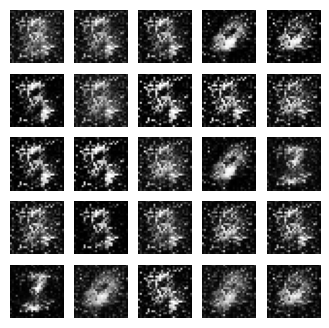

Epoch: 2


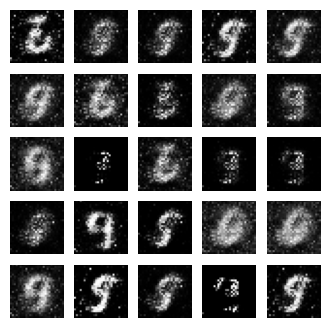

Epoch: 3


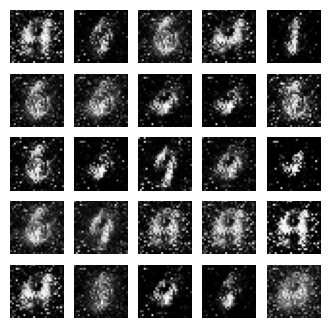

Epoch: 4


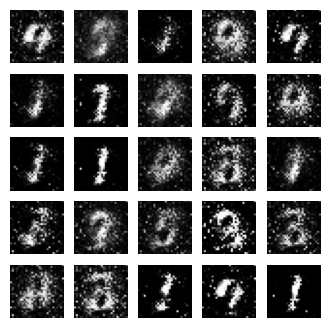

Epoch: 5


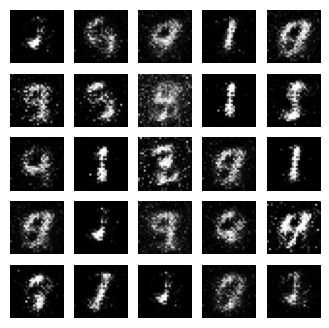

Epoch: 6


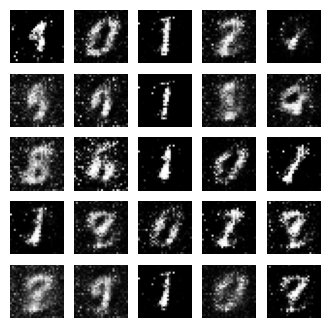

Epoch: 7


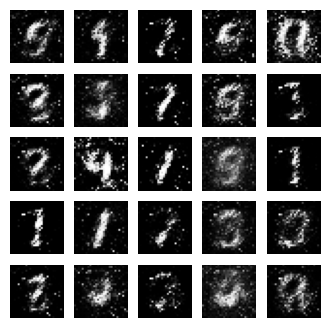

Epoch: 8


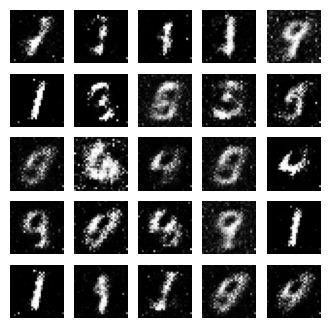

Epoch: 9


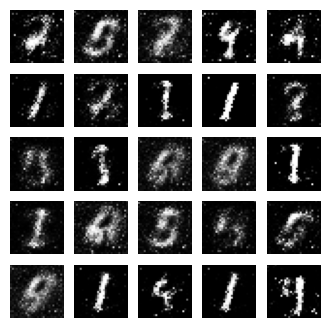

Epoch: 10


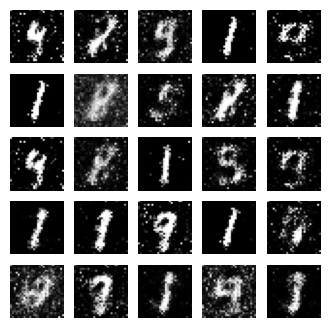

Epoch: 11


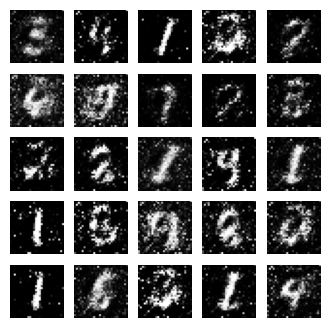

Epoch: 12


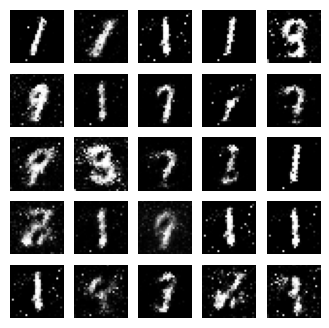

Epoch: 13


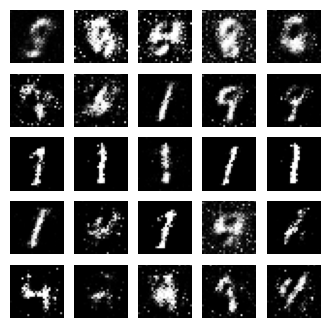

Epoch: 14


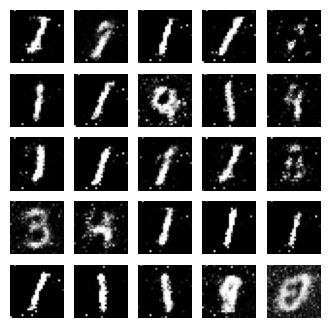

Epoch: 15


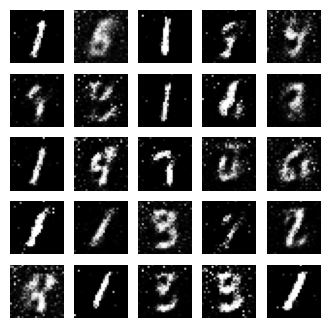

Epoch: 16


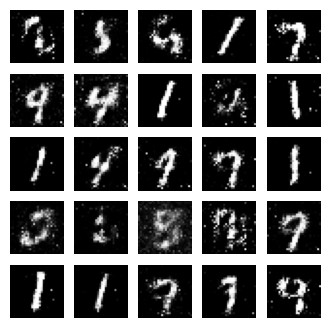

Epoch: 17


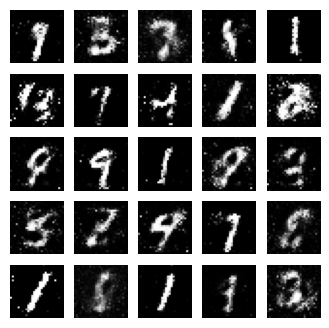

Epoch: 18


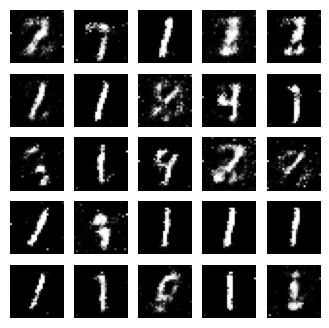

Epoch: 19


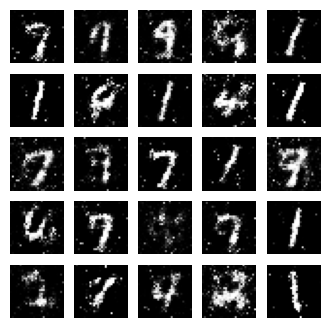

Epoch: 20


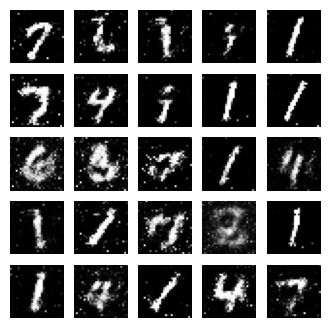

Epoch: 21


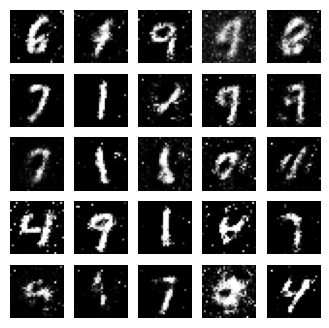

Epoch: 22


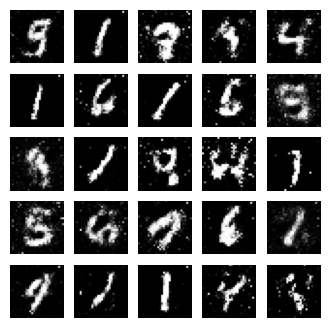

Epoch: 23


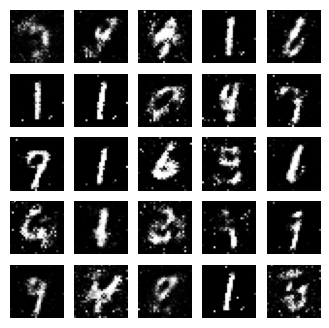

Epoch: 24


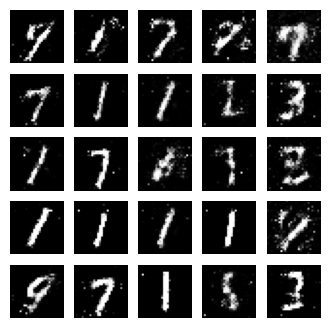

Epoch: 25


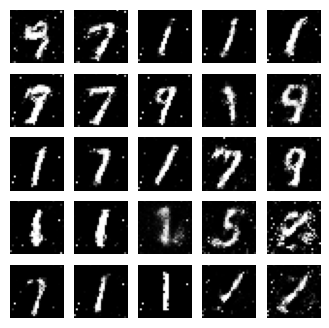

Epoch: 26


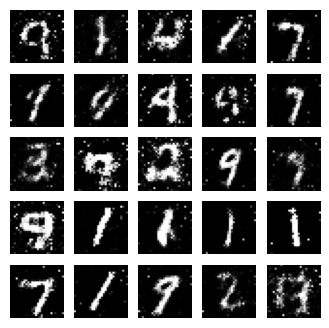

Epoch: 27


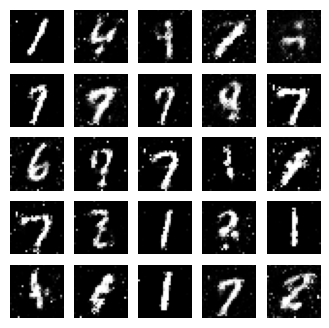

Epoch: 28


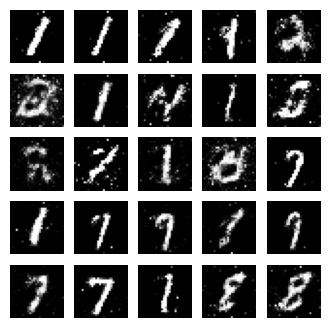

Epoch: 29


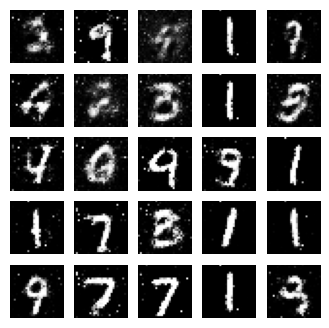

Epoch: 30


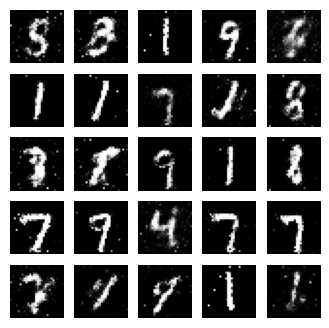

Epoch: 31


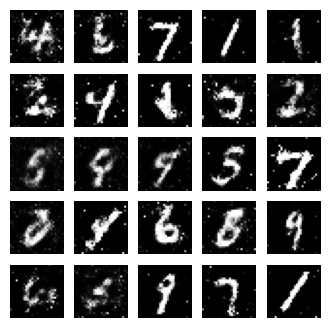

Epoch: 32


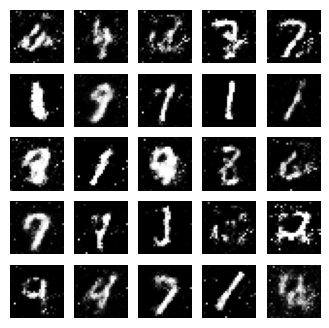

Epoch: 33


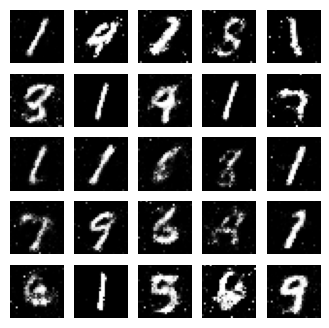

Epoch: 34


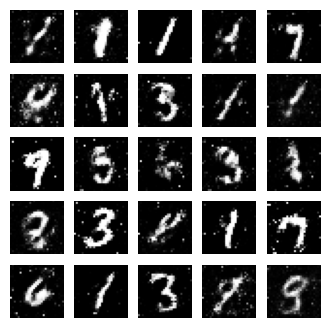

Epoch: 35


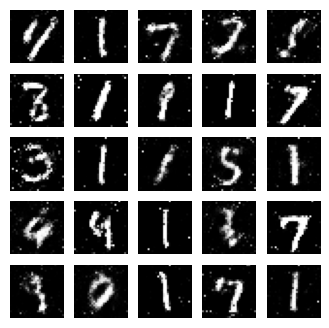

Epoch: 36


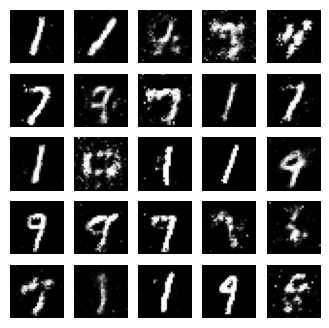

Epoch: 37


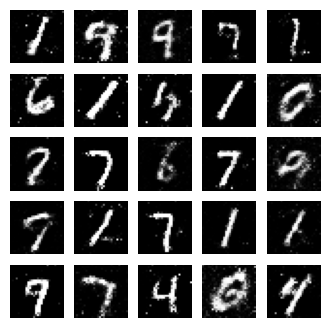

Epoch: 38


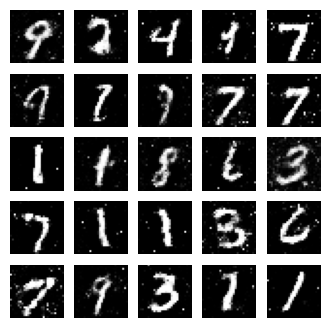

Epoch: 39


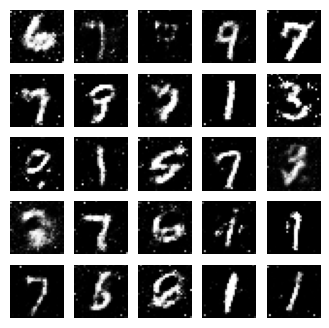

Epoch: 40


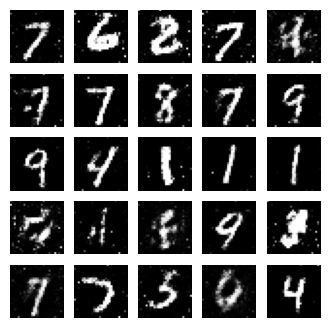

Epoch: 41


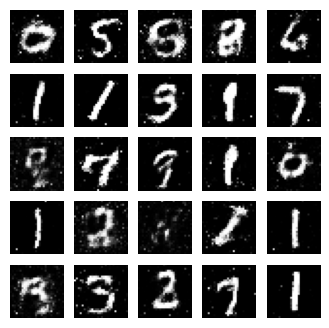

Epoch: 42


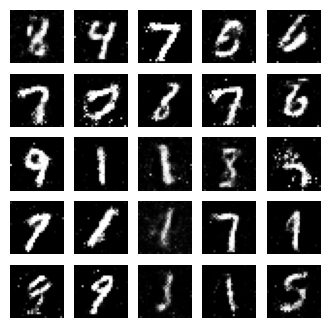

Epoch: 43


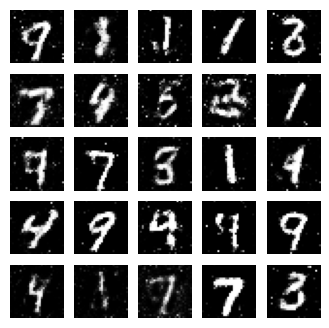

Epoch: 44


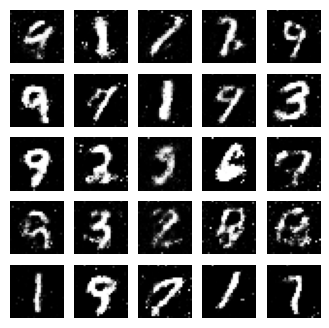

Epoch: 45


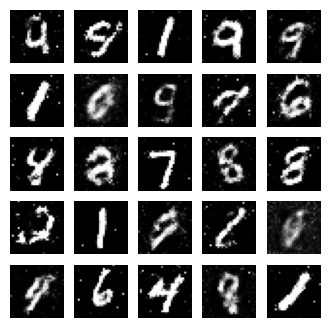

Epoch: 46


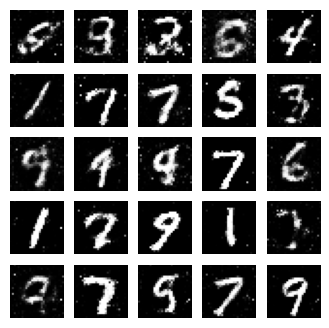

Epoch: 47


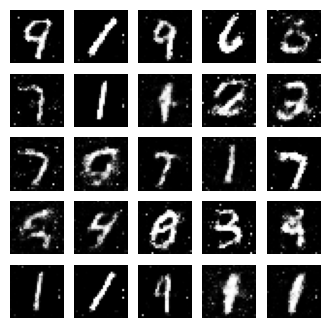

Epoch: 48


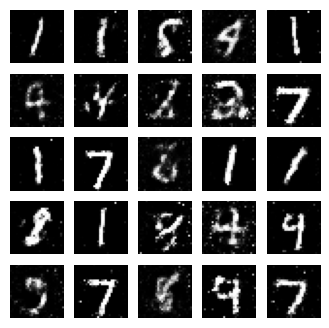

Epoch: 49


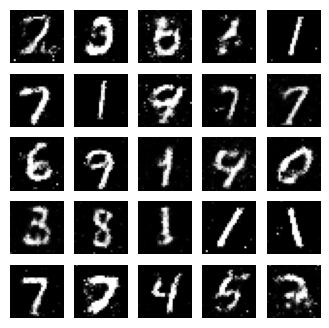

Epoch: 50


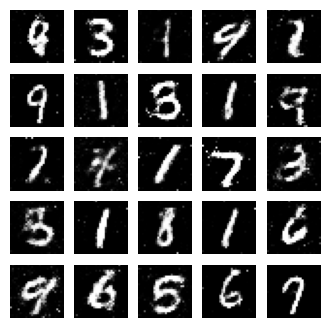

In [61]:
# 训练GAN
for epoch in range(epochs):
    for i, (imgs, _) in enumerate(dataloader):
        batch_size = imgs.size(0)
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # 训练判别器
        optimizer_D.zero_grad()
        imgs = imgs.view(batch_size, -1).to(device)
        validity_real = discriminator(imgs)
        validity_fake = discriminator(generator(torch.randn(batch_size, 100).to(device)))
        d_loss_real = adversarial_loss(validity_real, real_labels)
        d_loss_fake = adversarial_loss(validity_fake, fake_labels)
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_D.step()

        # 训练生成器
        optimizer_G.zero_grad()
        validity = discriminator(generator(torch.randn(batch_size, 100).to(device)))
        g_loss = adversarial_loss(validity, real_labels)
        g_loss.backward()
        optimizer_G.step()

    # 每个epoch结束时生成并展示图像示例
    print('Epoch:', epoch+1)
    sample_image = generator(torch.randn(25, 100).to(device)).detach().cpu().numpy()
    sample_image = sample_image.reshape(-1, 28, 28)
    plt.figure(figsize=(4, 4))
    for k in range(25):
        plt.subplot(5, 5, k + 1)
        plt.imshow(sample_image[k], cmap='gray')
        plt.axis('off')
    plt.show()
